# Worksheet 02

Name:  
UID: 

### Topics

- Effective Programming

### Effective Programming

a) What is a drawback of the top down approach?

Here you start with the abstract neccesities and then implememt each one, which can take a lot of time to debug. We know the "pseudo code" and what we want to implement, now we just need to write the blocks

b) What is a drawback of the bottom up approach?

Requires a little more planning when you have the building blocks, but need to combine them to make higher order functions in order to get your desired ourcome. You have every method you need, now you need to figure out how to use them for the psuedocide

c) What are 3 things you can do to have a better debugging experience?

1. Minimize your debugging space
2. Read the error
3. Dont Panic

d) (Optional) Follow along with the live coding. You can write your code here:

In [ ]:
class board:
    def __init__(self) :
        self.board = [[" - " for _ in range(8)]  for _ in range(8)]
    
    def __repr__(self):
        res = ""
        for row in range(8):
            for col in range(8):
                res += self.board[row][col]
        
        return res

    def set_queen_at(self, row, col):
        self.board[row][col] = "Q"

    def unset_queen_at(self, row):
        self.board[row] = ["-" for _ in range(8)] 

test = board()
test.set_queen_at(1, 1)
print(test)

#did not finish

## Exercise

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

The goal of this exercise is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops
3. code spans multiple lines

look through the pandas documentation for alternatives. This [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) may come in handy.

a) Complete the code below to read in a filepath to the `train.csv` and returns the DataFrame.

In [111]:
import pandas as pd

df = pd.read_csv('/Users/john/cs506/Data-Science-Fundamentals/lecture_02/train (1).csv')
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


b) Complete the code so it returns the number of rows that have at least one empty column value

In [112]:
empty_rows = df[df.isnull().any(axis=1)]
print("there are " +  str(len(empty_rows)) + " rows with at least one empty value")

there are 708 rows with at least one empty value


c) Complete the code below to remove all columns with more than 200 NaN values

In [113]:
df = df.drop(columns=df.columns[df.isnull().sum() > 200])
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

d) Complete the code below to replaces `male` with 0 and `female` with 1

In [114]:
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


e) Complete the code below to add four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column.

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

Anything not clearly one of the above 4 categories can be ignored.

In [115]:
df[['First Name', 'Middle Name', 'Last Name', 'Title']] = df['Name'].str.extract(r'([A-Za-z]+),\s([A-Za-z]+)\.\s?([A-Za-z]+)?\s?([A-Za-z]+)?')[[2, 3, 0, 1]]
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,NaN,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr


f) Complete the code below to replace all missing ages with the average age

In [116]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,NaN,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr


g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe.

<AxesSubplot:title={'center':'Average Age of Survivors vs Non-Survivors'}, xlabel='Survived', ylabel='Average Age'>

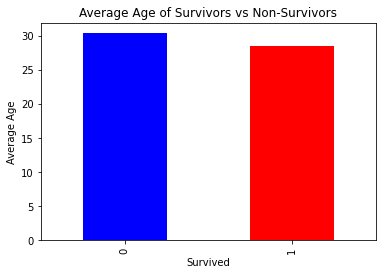

In [117]:
df.groupby('Survived')['Age'].mean().plot(kind='bar', color=['blue', 'red'], title='Average Age of Survivors vs Non-Survivors', xlabel='Survived', ylabel='Average Age')

What I observed is that the average age for survivors vs non survivors is actually quite similar, having maybe 2-3 years difference max. It seems the avreage age for those who survived may have been skewed by the children who were prioritized during the ships sinking, making it a bit less than non survivers. Now if memory serves me right women were also prioritized to be saved over men, so I went ahead and did another graoh below to test it.

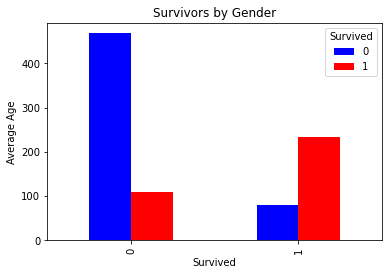

In [118]:
Genders = df.groupby(['Sex', 'Survived']).size().unstack().plot(kind='bar', color=['blue', 'red'], title='Survivors by Gender', xlabel='Survived', ylabel='Average Age')

Here we can see that for Men (0, as we changed before) many did not actually survive, yet for women many did. Something extra I wanted to run for my own sake as we know most surviviors were either children or women.